## Planar data classification (Manual NN)

In [2]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

import sys
sys.path.append('../cat_detector_manual_deepNN/')
from manual_NN import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

### Load, check and visualize the Dataset

X has features (x1, x2) and Y has labels (red:0, blue:1).

X shape: (2, 400)
Y shape: (1, 400)


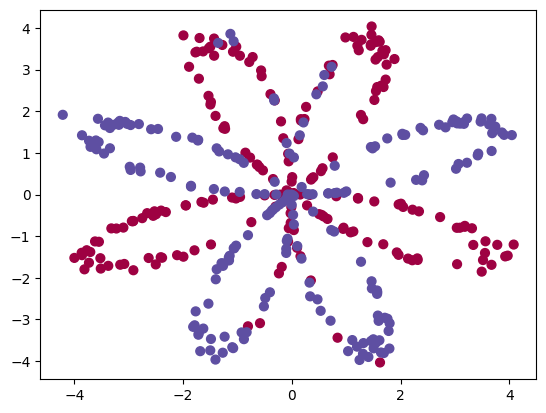

In [3]:
X, Y = load_planar_dataset()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

print("X shape:", X.shape)
print("Y shape:", Y.shape)

### Try sklearn's Logistic Regression

One unit of logistic regression can't do well on this data since it's not linearly separable.
A neural network would do better.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


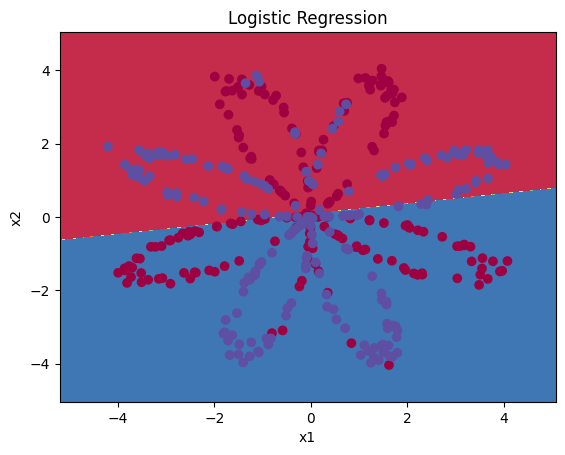

In [4]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV(); # TODO: why ; here?
#clf.fit(X.T, Y.T);
clf.fit(X.T, Y.T.flatten()); # use flatten() to get 1d array and remove the warning

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

### Neural Network model

input(x1.x2) --> one tanh activation layer with 4 neurons --> one sigmoid output layer with 1 neuron

Cost after iteration 0: 0.7088135432785352
Cost after iteration 100: 0.34321454256013767
Cost after iteration 200: 0.3191865701079587
Cost after iteration 300: 0.3086902318359472
Cost after iteration 400: 0.30203346349075316
Cost after iteration 500: 0.2969552986009296
Cost after iteration 600: 0.29231542297299884
Cost after iteration 700: 0.28771126299213357
Cost after iteration 800: 0.2845107397280017
Cost after iteration 900: 0.2822575279726336
Cost after iteration 1000: 0.2803690952015311
Cost after iteration 1100: 0.27870235355874373
Cost after iteration 1200: 0.27719885196856525
Cost after iteration 1300: 0.27582437292521855
Cost after iteration 1400: 0.2745556752785236
Cost after iteration 1500: 0.2733758779060483
Cost after iteration 1600: 0.27227229269289793
Cost after iteration 1700: 0.27123517054787355
Cost after iteration 1800: 0.2702568827188083
Cost after iteration 1900: 0.2693313540248386
Cost after iteration 2000: 0.26845365932956106
Cost after iteration 2100: 0.2676197

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

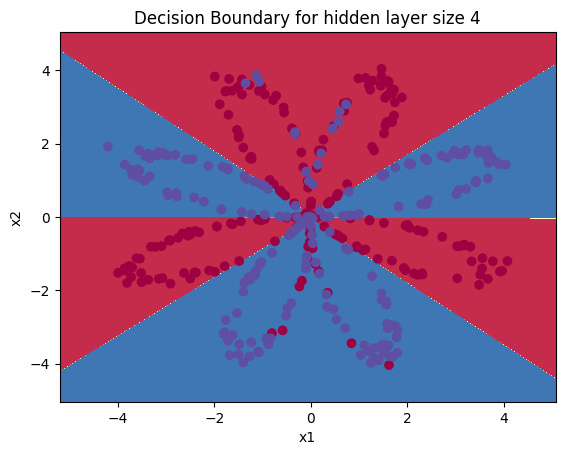

In [5]:
# Build the model as specified and train it
parameters, costs = train_L_layer_model(X, Y, [2, 4, 1], learning_rate = 1.2, num_iterations = 10000,\
                                        print_cost=True, h_layer_activations="tanh")

# Predict
predictions = predict(X, Y, parameters, h_layer_activations="tanh")

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(x.T, Y, parameters, h_layer_activations="tanh"), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [6]:
# Print accuracy
#predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


Accuracy is really high compared to Logistic Regression. The model has learned the patterns of the flower's petals! Unlike logistic regression, neural networks are able to learn even highly non-linear decision boundaries. 

### Tuning hidden layer size (optional/ungraded exercise)

Run the following code(it may take 1-2 minutes). Then, observe different behaviors of the model for various hidden layer sizes.

Cost after iteration 4999: 0.6439620301296872
Accuracy: 0.0
Accuracy: 0.6624999999999999
Accuracy for 1 hidden units: 66.25 %
Cost after iteration 4999: 0.5753300926460881
Accuracy: 0.0
Accuracy: 0.6724999999999999
Accuracy for 2 hidden units: 67.25 %
Cost after iteration 4999: 0.25901429888914623
Accuracy: 0.0
Accuracy: 0.9074999999999999
Accuracy for 3 hidden units: 90.75 %
Cost after iteration 4999: 0.2543216617272415
Accuracy: 0.0
Accuracy: 0.9074999999999999
Accuracy for 4 hidden units: 90.75 %
Cost after iteration 4999: 0.2348087453240072
Accuracy: 0.0
Accuracy: 0.9074999999999999
Accuracy for 5 hidden units: 90.75 %
Cost after iteration 4999: 0.17469182471497874
Accuracy: 0.0
Accuracy: 0.9124999999999999
Accuracy for 20 hidden units: 91.25 %
Cost after iteration 4999: 0.18028836154217173
Accuracy: 0.0
Accuracy: 0.9049999999999999
Accuracy for 50 hidden units: 90.5 %


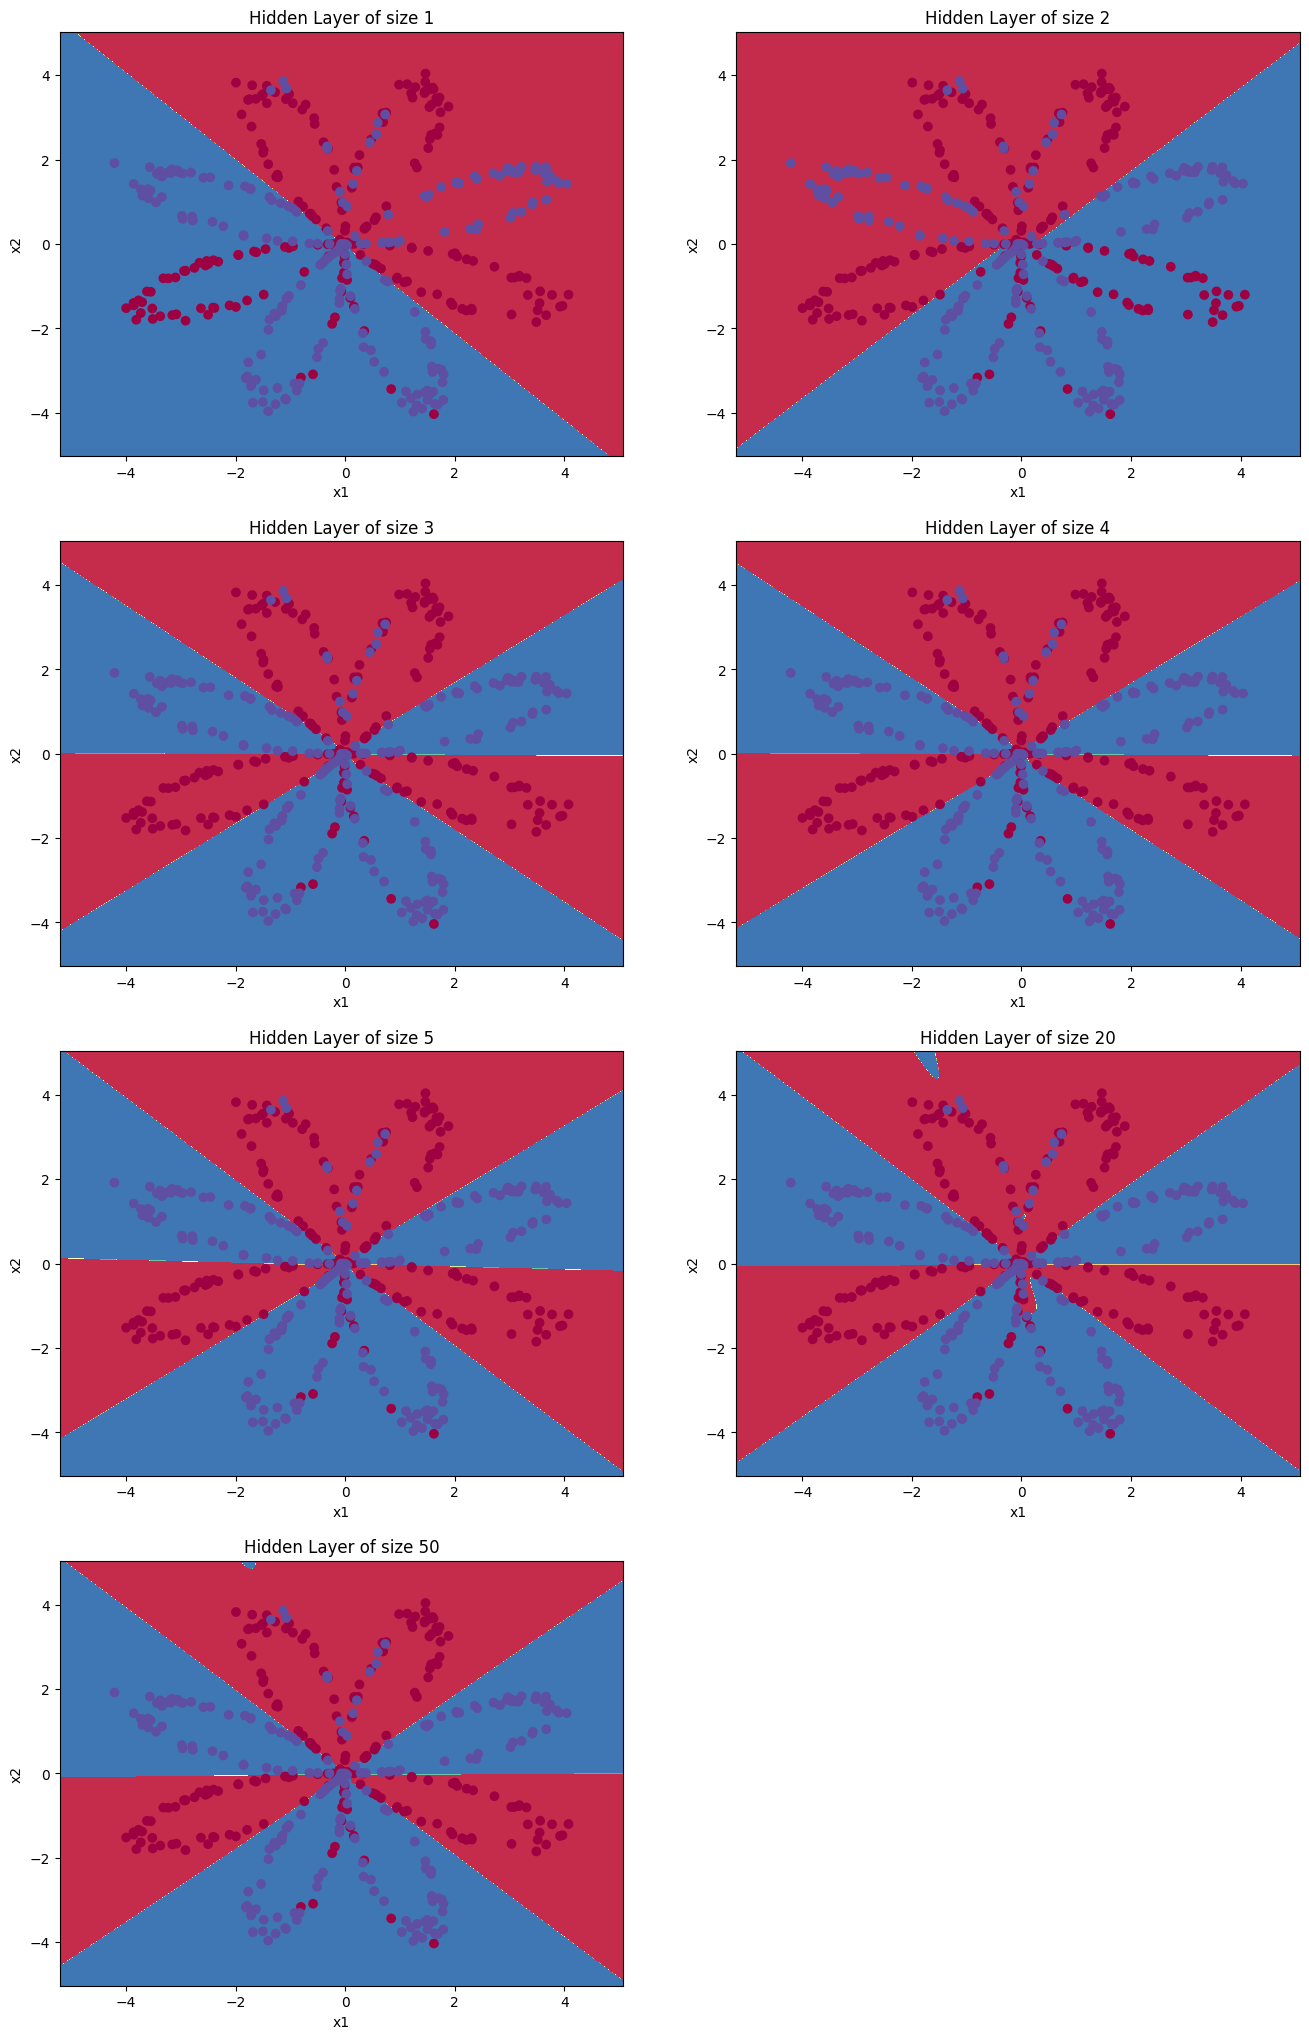

In [8]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    #parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    parameters, cost = train_L_layer_model(X, Y, [2, n_h, 1], learning_rate = 1.2, num_iterations = 5000,\
                                        print_cost=False, h_layer_activations="tanh")
    plot_decision_boundary(lambda x: predict(x.T, Y, parameters, h_layer_activations="tanh"), X, Y)
    predictions = predict(X, Y, parameters, h_layer_activations="tanh")
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.
- Later, you'll become familiar with regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

<a name='7'></a>
## 7- Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

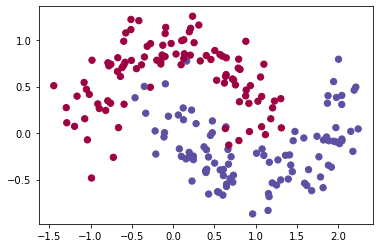

In [32]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

**References**:

- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/